In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ticket-cancellation-prediction-final/sample_submission.csv
/kaggle/input/ticket-cancellation-prediction-final/train.csv
/kaggle/input/ticket-cancellation-prediction-final/test.csv


# Team birgerkings
- Yukta Rajapur IMT2021066
- Brij Desai IMT2021067
- Varshith Vattikuti IMT2021078

# Preprocessing and Data Cleaning

## Loading Data

In [2]:
train_df = pd.read_csv("/kaggle/input/ticket-cancellation-prediction-final/train.csv")
train_df

,ID,TimeOfCreation,TimeOfDeparture,BillNo.,TicketNo.,StatusofReserve,UserID,Gender-Male,Price,Discounts,...,DomesticFlight,TypeOfVehicle,VehicleClass,ReasonForTrip,ModeOfTravel,PassportNumberHashed,EmailHashed,BuyerMobile,NationalCode,Cancelled
0,100505,2022-07-06 06:02:12.407,2022-07-06 10:30:00,38131030,7359427.0,3,NaN,True,850000.0,0.0,...,1,اسکانیا کلاسیک ۳۲نفره,True,Int,Bus,NaN,51726016301ff645e88be828ae6277a23ea22fcab14880...,965396967731,103017017,0
1,100506,2022-09-11 13:51:08.797,2022-09-13 14:45:00,39115817,3002688.0,2,891421.0,True,5338000.0,0.0,...,1,5ستاره اكونومي سلامت فدك,NaN,Int,Train,NaN,e5a486781dac75d915322638102f2bafd512687be5d814...,452719996887,261570051,0
2,100507,2022-08-01 14:45:28.883,2022-08-24 20:39:00,38510118,2927990.0,4,NaN,False,1355000.0,0.0,...,1,3 ستاره 6 تخته کوير,NaN,Work,Train,NaN,NaN,116690640411,957707173,1
3,100508,2022-09-29 10:41:28.120,2022-09-29 20:30:00,39403118,7663791.0,3,264716.0,True,2540000.0,0.0,...,1,VIP 2+1 / یک وعده غذای گرم,True,Work,Bus,NaN,b565e2250ec788a19435ec680fd11c47f77f0c92587bf4...,642337257287,264441760,0
4,100509,2022-10-03 16:43:35.277,2022-10-04 12:15:00,39470084,7681449.0,3,76842.0,True,1690000.0,0.0,...,1,VIPمارال تخت شو با شارژر اختصاصی,True,Int,Bus,NaN,aa472b493e4499370b308a11358755bef6c4b04def69f2...,138128253547,765571492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,171211,2022-04-07 20:00:01.463,2022-04-08 23:00:00,36839872,7018030.0,5,NaN,True,1250000.0,0.0,...,1,VIP تخت شو با تغذیه و شارژر اختصاصی,True,Work,Bus,NaN,NaN,331267793363,786340025,1
70707,171212,2022-06-09 07:48:10.583,2022-06-09 16:50:00,37704940,2825554.0,2,NaN,True,3490000.0,0.0,...,1,4ستاره 4تخته غزال,NaN,Work,Train,NaN,5f8a8f968e1acf15fd5c1bc6972c43af532825df83bbce...,409302394890,223381594,0
70708,171213,2022-08-13 07:19:38.040,2022-08-14 23:15:00,38660767,7510813.0,3,NaN,True,1725000.0,0.0,...,1,VIPمانیتوردار,True,Work,Bus,NaN,a3a16f687108ba4854855f3788efc31c8b368fbfb68994...,666188659988,1940457,0
70709,171214,2022-05-02 12:38:36.460,2022-05-03 19:00:00,37152781,7096569.0,3,NaN,False,3200000.0,0.0,...,1,VIPمانیتوردار,True,Int,Bus,NaN,NaN,832973699414,194725973,0


## Removing Duplicates

In [3]:
train_df.drop_duplicates(inplace=True)

In [4]:
train_df.shape

(70711, 22)

## Identifying number of null values in columns

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    70711 non-null  int64  
 1   TimeOfCreation        70711 non-null  object 
 2   TimeOfDeparture       70711 non-null  object 
 3   BillNo.               70711 non-null  int64  
 4   TicketNo.             70711 non-null  float64
 5   StatusofReserve       70711 non-null  int64  
 6   UserID                29680 non-null  float64
 7   Gender-Male           70711 non-null  bool   
 8   Price                 70711 non-null  float64
 9   Discounts             70711 non-null  float64
 10  CityFrom              70711 non-null  object 
 11  CityTo                70711 non-null  object 
 12  DomesticFlight        70711 non-null  int64  
 13  TypeOfVehicle         65422 non-null  object 
 14  VehicleClass          43826 non-null  object 
 15  ReasonForTrip      

In [6]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages.sort_values(ascending=False)

PassportNumberHashed    99.130263
UserID                  58.026333
EmailHashed             57.446508
VehicleClass            38.020959
TypeOfVehicle            7.479741
ID                       0.000000
DomesticFlight           0.000000
NationalCode             0.000000
BuyerMobile              0.000000
ModeOfTravel             0.000000
ReasonForTrip            0.000000
CityTo                   0.000000
TimeOfCreation           0.000000
CityFrom                 0.000000
Discounts                0.000000
Price                    0.000000
Gender-Male              0.000000
StatusofReserve          0.000000
TicketNo.                0.000000
BillNo.                  0.000000
TimeOfDeparture          0.000000
Cancelled                0.000000
dtype: float64

In [7]:
columns_to_drop = ['UserID', 'PassportNumberHashed', 'EmailHashed', 'VehicleClass']

## Observing unique values in each column

In [8]:
train_df.nunique().sort_values(ascending=False)

ID                      70711
TicketNo.               70668
BillNo.                 54448
TimeOfCreation          54448
NationalCode            51001
BuyerMobile             35773
TimeOfDeparture         26891
EmailHashed             13826
UserID                  12773
Price                    3735
TypeOfVehicle            2844
Discounts                1624
PassportNumberHashed      543
CityTo                    287
CityFrom                  219
ModeOfTravel                4
StatusofReserve             4
VehicleClass                2
ReasonForTrip               2
DomesticFlight              2
Gender-Male                 2
Cancelled                   2
dtype: int64

# EDA

## Percentage cancellations

In [9]:
is_can = len(train_df[train_df['Cancelled']==1])
print("Percentage cancelation= ", is_can/len(train_df))
print(train_df['StatusofReserve'].value_counts(normalize=True)*100)

Percentage cancelation=  0.15204140798461344
StatusofReserve
3    42.095289
2    30.911739
5    19.883752
4     7.109219
Name: proportion, dtype: float64


## Correlation Heatmap

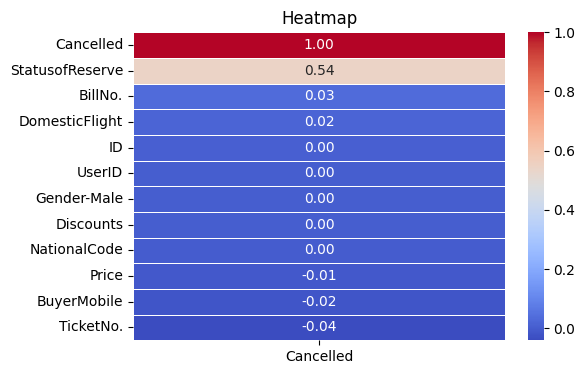

In [10]:
cancelled_correlation = train_df.corr(numeric_only=True)["Cancelled"].sort_values(ascending = False)

# Create a heatmap for the "Cancelled" column
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(cancelled_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Heatmap")
plt.show()

## Identifying columns with low correlation

In [11]:
columns_to_drop.extend(['ID', 'NationalCode', 'EmailHashed', 'UserID', 'Gender-Male', 'Discounts', 'TypeOfVehicle', 'CityTo', 'CityFrom'])
train_df = train_df.drop(columns_to_drop, axis=1)
train_df.shape

(70711, 11)

## Histplot of price

<Axes: xlabel='Price', ylabel='Count'>

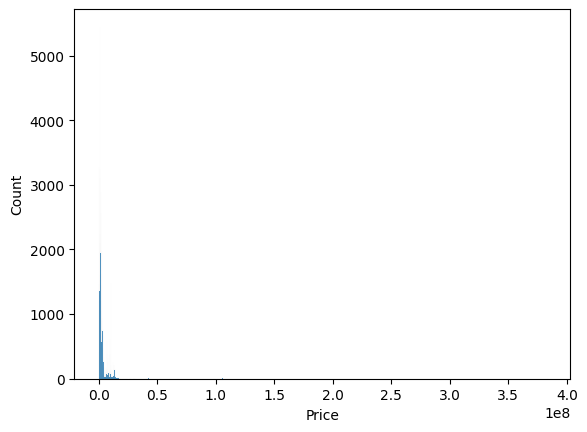

In [12]:
sns.histplot(train_df['Price'])

## Analysis on Status of Reserve

In [13]:
train_df["StatusofReserve"].value_counts()

StatusofReserve
3    29766
2    21858
5    14060
4     5027
Name: count, dtype: int64

<Axes: xlabel='StatusofReserve', ylabel='Cancelled'>

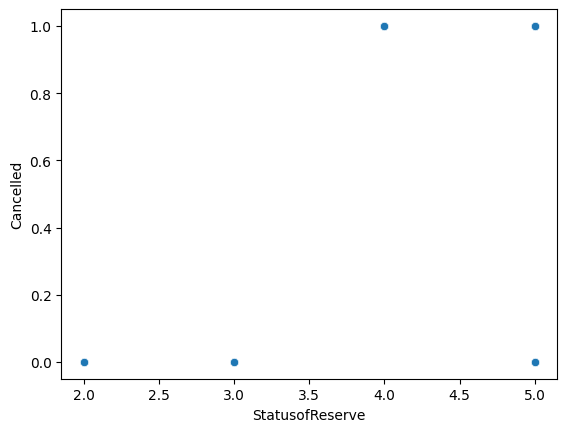

In [14]:
sns.scatterplot(x=train_df["StatusofReserve"], y=train_df["Cancelled"])

<Axes: xlabel='StatusofReserve', ylabel='count'>

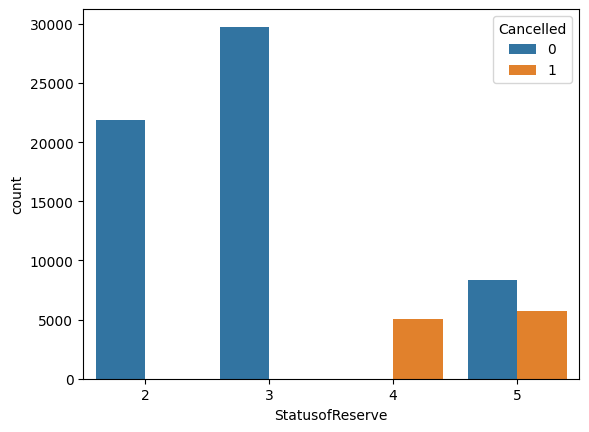

In [15]:
sns.countplot(data=train_df, x='StatusofReserve', hue='Cancelled')

# Feature Engineering

## Converting timestamp to datetime

In [16]:
train_df['TimeOfCreation'] = (pd.to_datetime(train_df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
train_df['TimeOfDeparture'] = (pd.to_datetime(train_df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

## Adding a timestamp difference column

In [17]:
train_df['timestamp_diff_seconds'] = (train_df['TimeOfDeparture'] - train_df['TimeOfCreation'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TimeOfCreation          70711 non-null  int64  
 1   TimeOfDeparture         70711 non-null  int64  
 2   BillNo.                 70711 non-null  int64  
 3   TicketNo.               70711 non-null  float64
 4   StatusofReserve         70711 non-null  int64  
 5   Price                   70711 non-null  float64
 6   DomesticFlight          70711 non-null  int64  
 7   ReasonForTrip           70711 non-null  object 
 8   ModeOfTravel            70711 non-null  object 
 9   BuyerMobile             70711 non-null  int64  
 10  Cancelled               70711 non-null  int64  
 11  timestamp_diff_seconds  70711 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 6.5+ MB


<Axes: xlabel='timestamp_diff_seconds', ylabel='Count'>

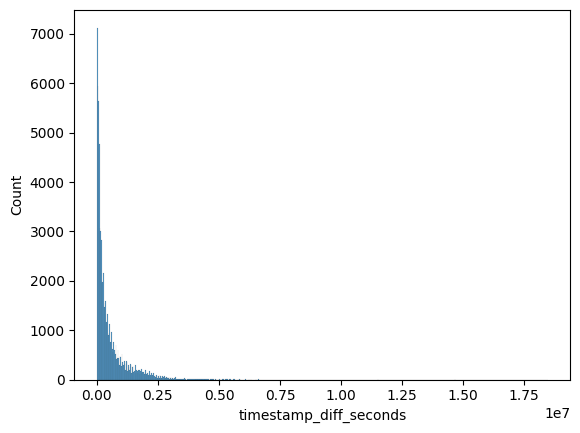

In [18]:
sns.histplot(train_df['timestamp_diff_seconds'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


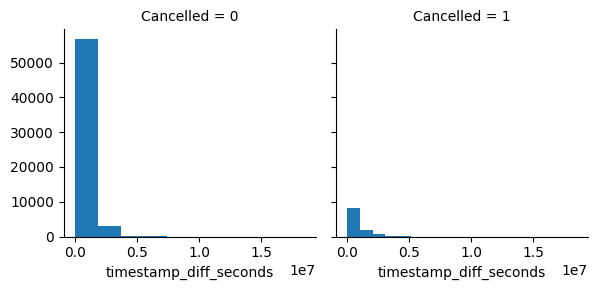

In [19]:
grid = sns.FacetGrid(train_df, col='Cancelled')
grid.map(plt.hist, 'timestamp_diff_seconds')
grid.add_legend()

## Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [ 'ReasonForTrip', 'ModeOfTravel']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])
train_df.columns

Index(['TimeOfCreation', 'TimeOfDeparture', 'BillNo.', 'TicketNo.',
       'StatusofReserve', 'Price', 'DomesticFlight', 'ReasonForTrip',
       'ModeOfTravel', 'BuyerMobile', 'Cancelled', 'timestamp_diff_seconds'],
      dtype='object')

# Training Ensemble models

## Train-Test-Split with 80-20 ratio

In [21]:
from sklearn.model_selection import train_test_split
y = train_df['Cancelled']
x = train_df.drop(['Cancelled'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.99, random_state=42)

## Balancing the dataset

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=2)

x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

## Gradient Boosting Classifier (Boosting)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier().fit(x_train_sm, y_train_sm)
y_pred1 = clf.predict(x_test)
f1 = f1_score(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)
print('F1:', f1)
print('Accuracy:', accuracy)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

print('\nConfusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print('Total Errors = ', cm[0, 1] + cm[1, 0])

F1: 0.9433962264150945
Accuracy: 0.9830508474576272

Confusion matrix

 [[596   0]
 [ 12 100]]

True Positives(TP) =  596

True Negatives(TN) =  100

False Positives(FP) =  0

False Negatives(FN) =  12
Total Errors =  12


## Random Forest Classifier (Bagging)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train_sm, y_train_sm)
y_pred3 = rfc.predict(x_test)
f1 = f1_score(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)
print('F1:', f1)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred3)

print('\nConfusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print('Total Errors = ', cm[0, 1] + cm[1, 0])

F1: 0.962962962962963
Accuracy: 0.9887005649717514

Confusion matrix

 [[596   0]
 [  8 104]]

True Positives(TP) =  596

True Negatives(TN) =  104

False Positives(FP) =  0

False Negatives(FN) =  8
Total Errors =  8


## Histogram Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier().fit(x_train_sm, y_train_sm)
y_pred4 = hgbc.predict(x_test)
f1 = f1_score(y_test, y_pred4)
accuracy = accuracy_score(y_test, y_pred4)
print('F1:', f1)
print('Accuracy:', accuracy)

F1: 0.9444444444444444
Accuracy: 0.9830508474576272


## Stacking Classifier

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('rf', rfc),('gbc', clf), ('hgbc', hgbc)]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(x_train_sm, y_train_sm)
y_pred5 = sc.predict(x_test)
f1 = f1_score(y_test, y_pred5)
accuracy = accuracy_score(y_test, y_pred5)
print('F1:', f1)
print('Accuracy:', accuracy)

F1: 0.9541284403669724
Accuracy: 0.9858757062146892


## Voting Classifier

In [28]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('rf', rfc),('gbc', clf), ('hgbc', hgbc)], voting='hard').fit(x_train_sm, y_train_sm)
y_pred6 = vc.predict(x_test)
f1 = f1_score(y_test, y_pred6)
accuracy = accuracy_score(y_test, y_pred6)
print('F1:', f1)
print('Accuracy:', accuracy)

F1: 0.948356807511737
Accuracy: 0.9844632768361582


## Hyperparameter tuning RFC

In [ ]:
n_estimators = [50,100,150] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [ ]:
#rf_random.fit(x_train_sm, y_train)



In [ ]:
# print the best parameters
#print ('Best Parameters: ', rf_random.best_params_, ' \n')

# Testing the model

In [34]:
test = pd.read_csv('/kaggle/input/ticket-cancellation-prediction-final/test.csv')
id=test['ID']
id

0        171216
1        171217
2        171218
3        171219
4        171220
          ...  
30301    201517
30302    201518
30303    201519
30304    201520
30305    201521
Name: ID, Length: 30306, dtype: int64

In [35]:
test_df = test.drop(columns_to_drop, axis=1)
for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])
test_df['TimeOfCreation'] = (pd.to_datetime(test_df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
test_df['TimeOfDeparture'] = (pd.to_datetime(test_df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
test_df['timestamp_diff_seconds'] = (test_df['TimeOfDeparture'] - test_df['TimeOfCreation'])

In [ ]:
Y_test_data = clf.predict(test_df)
dictionary={
    'ID':test['ID'],
    'Cancelled':Y_test_data
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('clf.csv', index=False)

In [ ]:
Y_test_data = rfc.predict(test_df)
dictionary={
    'ID':test['ID'],
    'Cancelled':Y_test_data
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('rfc.csv', index=False)

In [ ]:
Y_test_data = hgbc.predict(test_df)
dictionary={
    'ID':test['ID'],
    'Cancelled':Y_test_data
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('hgbc.csv', index=False)

In [37]:
Y_test_data = sc.predict(test_df)
dictionary={
    'ID':test['ID'],
    'Cancelled':Y_test_data
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('sc.csv', index=False)

In [32]:
Y_test_data = vc.predict(test_df)
dictionary={
    'ID':test['ID'],
    'Cancelled':Y_test_data
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('vc.csv', index=False)